In [ ]:

#  This NoteBook contains code to run classic ML routines against a 
#  number of familiar data sets ..
#



#  Step 00: Setup

In [1]:

#  Largely code to control how print statements and related work
#

%load_ext autoreload
%autoreload 2

%xmode Minimal


#  Setting display options 
#
import pandas as pd
pd.set_option("display.width", 640)
   #
import numpy as np
np.set_printoptions(edgeitems = 30, linewidth = 100000, 
   formatter = dict(float = lambda x: "%.3g" % x))

#  Sets horizontal scroll for wide outputs
#
from IPython.display import display, HTML
display(HTML(""))

   ###
    
from tabulate import tabulate
#
#  How to use tabulate-
#
#  l_result = [{ "col1": 20, "col2": 30}]
#  #
#  print(tabulate(l_result, headers='keys', tablefmt='psql', showindex=False))

print("--")


Exception reporting mode: Minimal


--


In [ ]:

#  Helper functions for what we want to do below-
#
#  **  You must run this cell to do much of anything in this NoteBook

#  We use these objects to store the history of results; display only
#
class HistoryIterator:
   def __init__(self, history):
       self._history = history
       self._index = 0

   def __next__(self):
       if (self._index < len(self._history._events)):
           result = (self._history._events[self._index]["event"] , self._history._events[self._index]["measure"])
           self._index +=1
           return result
       raise StopIteration

class History:
   def __init__(self):
      self._events = list()

   def clear(self):
      self._events = list()
    
   def add(self, event, measure):
      self._events.append({"event": event, "measure": measure})

   def __iter__(self):
      return HistoryIterator(self)


l_history = History()

print("--")


In [ ]:

#  Sometimes we want to clear history-
#

l_history.clear()


#  To add a blank line to history-
#

l_history.add(event = "", measure = "")

print("--")


In [ ]:

#  All of our model libraries are imported below, but ..
#





print("--")


#  Step A1: Iris Data load, encode

In [2]:

#  Read the Iris data into a Pandas Dataframe
#
#     Features
#     1. sepal length in cm
#     2. sepal width in cm
#     3. petal length in cm
#     4. petal width in cm
#     5. class: 
#        Iris-setosa
#        Iris-versicolour
#        Iris-virginica
#
#  To convert class into a numeric, we use sklearn.preprocessing.LabelEncoder
#  See,
#     https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn
#

from sklearn.preprocessing import LabelEncoder

my_le = LabelEncoder()
   #
l_folder = "20_Data"
l_file   = "11_iris.data.txt"


pd_iris  = pd.read_csv((l_folder + "/" + l_file), header = 0, sep = ",",
   names = ["sl", "sw", "pl", "pw", "class"],
   dtype = {"sl": "float", "sw": "float", "pl": "float", "pw": "float", "class": "string"} )
      #
pd_iris["class_encoded"]  =  my_le.fit_transform(pd_iris["class"])
   #
pd_iris = pd_iris.drop(["class"], axis = 1)
    
    
#  Pandas.Dataframe.sample() returns a randomized set of rows, versus
#  say head(), which always returns the first n ..
#
print(tabulate(pd_iris.sample(5), headers='keys', tablefmt='psql', showindex=False))
print("Number of rows: %d" % (len(pd_iris)))

print("--")

#  Sample output,
#
#     +------+------+------+------+-----------------+
#     |   sl |   sw |   pl |   pw |   class_encoded |
#     |------+------+------+------+-----------------|
#     |  5.5 |  2.4 |  3.8 |  1.1 |               1 |
#     |  6.4 |  3.2 |  4.5 |  1.5 |               1 |
#     |  6.8 |  3.2 |  5.9 |  2.3 |               2 |
#     |  6.7 |  3.3 |  5.7 |  2.1 |               2 |
#     |  5.5 |  2.6 |  4.4 |  1.2 |               1 |
#     +------+------+------+------+-----------------+
#     Number of rows: 149


+------+------+------+------+-----------------+
|   sl |   sw |   pl |   pw |   class_encoded |
|------+------+------+------+-----------------|
|  5.4 |  3   |  4.5 |  1.5 |               1 |
|  6.4 |  3.1 |  5.5 |  1.8 |               2 |
|  5.1 |  3.8 |  1.6 |  0.2 |               0 |
|  5.2 |  2.7 |  3.9 |  1.4 |               1 |
|  5.6 |  3   |  4.1 |  1.3 |               1 |
+------+------+------+------+-----------------+
Number of rows: 149
--


In [3]:

#  Split data into training and test.
#  Convert the data into numpy arrays, since the ml code we use later expect that.
#  We only want two of the classes, 1 and 2.
#  And we only want columns 2 and 3.
#
#     Why this data ?  It was harder to predict; see the plot below.
#


import numpy as np
from sklearn.model_selection import train_test_split

np_iris = {}
   #
np_iris["train"], np_iris["test"] = train_test_split(pd_iris.to_numpy(),              #  random_state calls to shuffle the data,
   test_size = 0.20, random_state = 40)                                               #    which had arrived sorted


#  Filter out given labels
#
np_iris["train_f"] = np_iris["train"][ ( np_iris["train"][:, -1] > 0) & ( np_iris["train"][:, -1] < 3) ]
np_iris["test_f" ] = np_iris["test" ][ ( np_iris["test" ][:, -1] > 0) & ( np_iris["test" ][:, -1] < 3) ]


#  Slicing only given columns
#
np_iris["train_fs"] = np_iris["train_f"][:, [2 ,3, 4]]
np_iris["test_fs" ] = np_iris["test_f" ][:, [2, 3, 4]] 


#  Outputs for confirmation
#
print("Number of total                 rows... %d   Training rows: %d   Test rows: %d" %
  (len(pd_iris), len(np_iris["train"]), len(np_iris["test"])) )
print()
print("Number of total filtered/sliced rows... %d   Training rows: %d   Test rows: %d" %
  ( len(np_iris["train_fs"]) + len(np_iris["test_fs"]),
    len(np_iris["train_fs"]), len(np_iris["test_fs"]) ) ) 
print()

print("Train data:")
print("%s" % (np_iris["train_fs"][0:5]))
print()
print("Test  data:")
print("%s" % (np_iris["test_fs" ][0:5]))
print()
   #
print("--")

#  Sample output
#
#     Number of total                 rows... 149   Training rows: 119   Test rows: 30
#     
#     Number of total filtered/sliced rows... 100   Training rows: 78   Test rows: 22
#     
#     Train data:
#     [[4.7 1.4 1]
#      [5.8 1.6 2]
#      [5.1 2.4 2]
#      [4.4 1.3 1]
#      [5.6 2.1 2]]
#     
#     Test  data:
#     [[4.1 1 1]
#      [5.5 1.8 2]
#      [6.9 2.3 2]
#      [4.4 1.2 1]
#      [5.6 2.4 2]]


Number of total                 rows... 149   Training rows: 119   Test rows: 30

Number of total filtered/sliced rows... 100   Training rows: 78   Test rows: 22

Train data:
[[4.7 1.4 1]
 [5.8 1.6 2]
 [5.1 2.4 2]
 [4.4 1.3 1]
 [5.6 2.1 2]]

Test  data:
[[4.1 1 1]
 [5.5 1.8 2]
 [6.9 2.3 2]
 [4.4 1.2 1]
 [5.6 2.4 2]]

--


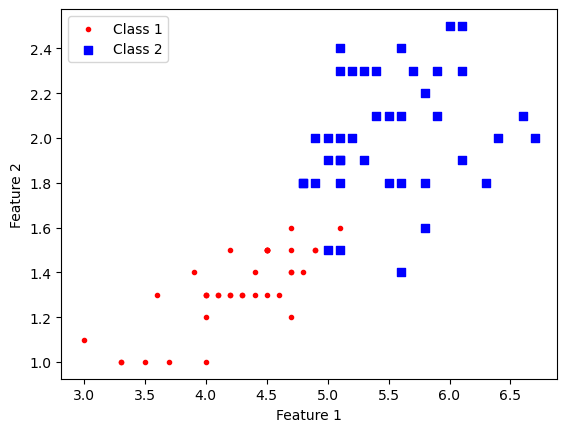

In [5]:

#  Plot of just two features from the two class data set
#

import matplotlib.pyplot as plt


plt.scatter(np_iris["train_fs"][np_iris["train_fs"][:, -1]==1][:, 0], np_iris["train_fs"][np_iris["train_fs"][:, -1]==1][:, 1], c = "red"  , label = "Class 1", marker = ".")
plt.scatter(np_iris["train_fs"][np_iris["train_fs"][:, -1]==2][:, 0], np_iris["train_fs"][np_iris["train_fs"][:, -1]==2][:, 1], c = "blue" , label = "Class 2", marker = ",")
    
plt.legend()
   #
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()



<div> 
<img src="./01_Images/09_Results_Chart.png" alt="Drawing" style="width: 800px;"/>  
</div>

#  Step A2: Iris Data train, test